# import Packages

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import pandas as pd
import os 
import shutil
from pathlib import Path
import random
from matplotlib.pyplot import imread
import matplotlib as plt
import numpy as np
import random

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing import image

In C:\Users\T-x23\anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\T-x23\anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\T-x23\anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Data Cleaning And Pre Processsing

In [3]:
FILE_PATH = Path("covid-chestxray-github/metadata.csv")
IMAGES_PATH=Path("covid-chestxray-github/images")

df = pd.read_csv(FILE_PATH)

man = []
female = []

for (i,r) in df.iterrows():
    if r["sex"]=="M":
        man.append(man)
    else:
        female.append(female)
#print("Male numbers",len(man),"Number or females,",len(female))


TARGET_DIR=Path("datasets/Covid")
#create folder is not exist
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid Folder Created")
    

Male numbers 432 Number or females, 323


In [38]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes'],
      dtype='object')

In [4]:
df.head(3)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN


In [52]:
Male=0
Female = 0
Unknown = 0 
for i,x in df.iterrows():
    if x["sex"]=="M":
        Male+=1
    elif x["sex"] =="F":
        Female+=1
    else:
        Unknown+=1
print("Male:",Male)
print("Female:",Female)
print("Unknown:",Unknown)

Male: 432
Female: 256
Unknown: 67


In [37]:
len(df)

755

In [36]:
len(df["RT_PCR_positive"]!="Y")

755

In [30]:
df["clinical_notes"].to_csv("text.csv",index=False)

In [59]:
#for i in df["clinical_notes"]:
for i,x in df.iterrows():
    print(x["clinical_notes"],33*"***",x["other_notes"],100* "- ")
    #print(100*"*")
    #print(i)


On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a ?wet market? (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung *************************************************************************************************** nan - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Chest X-Ray of a symptomatic patient on hospital days 1 (a), 3 (b), and 5 (c). Note the rapid progression of the pulmonary infiltrates over time *************************************************************************************************** nan - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Chest X-Ray of a symptomatic patient on hospital days 1 (a), 3 (b), and 5 (c). Note the rapid progression of the pulmonary infiltrates over time *************************************************************************************************** nan - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
A 63-year-old woman with metastatic ovarian cancer and recurrent malignant pleural effusion came to 

In [5]:
#PA radyoloji terminolojisinden bakmalisin
cnt = 0 #how mnay Covid-19 case we have in images ve iismleri ile alalim

for (i,row) in df.iterrows():
    if row["finding"]=="COVID-19"  and row["view"]=="PA":
        filename =row["filename"]
        image_path = os.path.join(IMAGES_PATH,filename) #filename ile image birlestir
        image_copy_path = os.path.join(TARGET_DIR,filename)
        shutil.copy2(image_path,image_copy_path)#butun fotolarin actigimiz covid pathina attik
        print("Moving image to Covid File",cnt)
        cnt+=1
print(cnt)

Moving image to Covid File 0
Moving image to Covid File 1
Moving image to Covid File 2
Moving image to Covid File 3
Moving image to Covid File 4
Moving image to Covid File 5
Moving image to Covid File 6
Moving image to Covid File 7
Moving image to Covid File 8
Moving image to Covid File 9
Moving image to Covid File 10
Moving image to Covid File 11
Moving image to Covid File 12
Moving image to Covid File 13
Moving image to Covid File 14
Moving image to Covid File 15
Moving image to Covid File 16
Moving image to Covid File 17
Moving image to Covid File 18
Moving image to Covid File 19
Moving image to Covid File 20
Moving image to Covid File 21
Moving image to Covid File 22
Moving image to Covid File 23
Moving image to Covid File 24
Moving image to Covid File 25
Moving image to Covid File 26
Moving image to Covid File 27
Moving image to Covid File 28
Moving image to Covid File 29
Moving image to Covid File 30
Moving image to Covid File 31
Moving image to Covid File 32
Moving image to Covi

In [6]:
#normal dataset from KAGGLE would be used
#traninin-->Normal
#samplin of images from kaggle

KAGGLE_FILE_PATH=Path("chest_xray_kaggle/train/NORMAL")
TARGET_NORMAL_DIR=Path("datasets/normal_images")

# make list of the all images
image_names =os.listdir(KAGGLE_FILE_PATH)


In [7]:
random.shuffle(image_names)

#206 file size
for i in range(206):
    image_name =image_names[i]#random shuffle them
    image_copy_path =os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)#coppy images -image path and target
    
    print("Copying image",i)

Copying image 0
Copying image 1
Copying image 2
Copying image 3
Copying image 4
Copying image 5
Copying image 6
Copying image 7
Copying image 8
Copying image 9
Copying image 10
Copying image 11
Copying image 12
Copying image 13
Copying image 14
Copying image 15
Copying image 16
Copying image 17
Copying image 18
Copying image 19
Copying image 20
Copying image 21
Copying image 22
Copying image 23
Copying image 24
Copying image 25
Copying image 26
Copying image 27
Copying image 28
Copying image 29
Copying image 30
Copying image 31
Copying image 32
Copying image 33
Copying image 34
Copying image 35
Copying image 36
Copying image 37
Copying image 38
Copying image 39
Copying image 40
Copying image 41
Copying image 42
Copying image 43
Copying image 44
Copying image 45
Copying image 46
Copying image 47
Copying image 48
Copying image 49
Copying image 50
Copying image 51
Copying image 52
Copying image 53
Copying image 54
Copying image 55
Copying image 56
Copying image 57
Copying image 58
Copying

# Test Validation

In [8]:
TRAIN_PATH =Path("CovidDataset/Train")
VAL_PATH=Path("CovidDataset/Val")

# CNN Model Architecture

In [9]:
#CNN MODEL

model=keras.Sequential()

model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(224,224,3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))



model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0

# Generators 

In [10]:
#genrerator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rescale =1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                )
test_dataset = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
train_datagenerator = train_datagen.flow_from_directory(
            
                        "CovidDataset/Train",
                        target_size= (224,224),
                        batch_size = 32,
                        class_mode="binary")

Found 224 images belonging to 2 classes.


In [12]:
#see the clasesses
train_datagenerator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
validation_datagenerator = test_dataset.flow_from_directory(
            
                        "CovidDataset/Val",
                        target_size= (224,224),
                        batch_size = 32,
                        class_mode="binary")

Found 60 images belonging to 2 classes.


In [14]:
validation_datagenerator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
hist = model.fit_generator(
                train_datagenerator,
                steps_per_epoch =8,
                epochs=20,
                validation_data=validation_datagenerator,
                validation_steps =2)

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 3.6254 - accuracy: 0.5781 - val_loss: 0.6594 - val_accuracy: 0.5333
Epoch 2/20
8/8 [==============================] - 5s 667ms/step - loss: 0.5876 - accuracy: 0.7070 - val_loss: 0.4778 - val_accuracy: 0.8833
Epoch 3/20
8/8 [==============================] - 6s 694ms/step - loss: 0.4935 - accuracy: 0.7773 - val_loss: 0.3733 - val_accuracy: 0.9167
Epoch 4/20
8/8 [==============================] - 6s 696ms/step - loss: 0.3485 - accuracy: 0.8438 - val_loss: 0.2165 - val_accuracy: 0.9333
Epoch 5/20
8/8 [==============================] - 5s 667ms/step - loss: 0.3741 - accuracy: 0.8477 - val_loss: 0.1916 - val_accuracy: 0.9333
Epoch 6/20
8/8 [==============================] - 6s 733ms/step - loss: 0.1941 - accuracy: 0.9414 - val_loss: 0.1518 - val_accuracy: 0.9333
Epoch 7/20
8/8 [==============================] - 6s 763ms/step - loss: 0.1919 - accuracy: 0.9375 - val_loss: 0.1240 - val_accuracy: 0.9667
Epoch 8/20
8/8 [=======

# MODEL AND USAGE

In [16]:
#model saving
model.save("model_adv.h5")
#model Accuracy
model.evaluate_generator(train_datagenerator)

[0.03713847470602819, 0.98214287]

In [17]:
#Validaton Accuracy
model.evaluate_generator(validation_datagenerator)

[0.10020312294363976, 0.95]

In [18]:
#get recorede model
model =tf.keras.models.load_model("model_adv.h5")

In [19]:
#see model indices
train_datagenerator.class_indices

{'Covid': 0, 'Normal': 1}

In [20]:
y_actual = []
y_test   = []

for i in os.listdir("CovidDataset/Val/Normal/"):
    img = image.load_img("CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p = model.predict_classes(img) 
    y_test.append(p[0,0])
    y_actual.append(1)
    
    
for i in os.listdir("CovidDataset/Val/Covid/"):
    img = image.load_img("CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p = model.predict_classes(img) 
    y_test.append(p[0,0])
    y_actual.append(0)
    

In [21]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [23]:
!pip install scikit-learn

  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
cm

array([[30,  0],
       [ 2, 28]], dtype=int64)

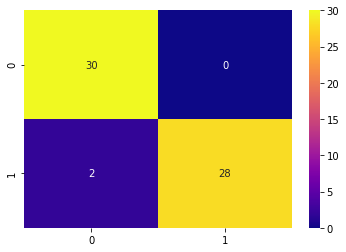

In [25]:
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)

In [ ]:
#TP = 30 (correctly predicted who has corona) bu sayi buyuk olmali
#FN = 0 hasta olupda hasta degil dediklerimiz ¤bu sayi sifira yakin olmali
#TN = 28 hasta olmayipda hasta olmadigini tahmin ettiklerimiz #bu sayi buyuk olmali
#FP = 2 hasta olmayipda hasta dediklerimiz ¤ bu sayida sifira yakin olamli
#